In [1]:
install.packages('R.utils')
library(data.table)
library(TwoSampleMR)

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

TwoSampleMR version 0.5.6 
[>] New: Option to use non-European LD reference panels for clumping etc
[>] Some studies temporarily quarantined to verify effect allele
[>] See news(package='TwoSampleMR') and https://gwas.mrcieu.ac.uk for further details




In [2]:
exp_raw <- fread("sumstats/phenocode-KoGES_BMI.tsv.gz")
exp_raw <- subset(exp_raw,exp_raw$pval<5e-8)
exp_dat <- format_data( exp_raw,
    type = "exposure",
    snp_col = "rsids",
    beta_col = "beta",
    se_col = "sebeta",
    effect_allele_col = "alt",
    other_allele_col = "ref",
    eaf_col = "af",
    pval_col = "pval",
)
clumped_exp <- clump_data(exp_dat,clump_r2=0.01,pop="EAS") 

No phenotype name specified, defaulting to 'exposure'.

Warning message in .fun(piece, ...):
“Duplicated SNPs present in exposure data for phenotype 'exposure. Just keeping the first instance:
























rs4665740

















































































rs7201608









































”
API: public: http://gwas-api.mrcieu.ac.uk/

Please look at vignettes for options on running this locally if you need to run many instances of this command.

Clumping zkkhgz, 2452 variants, using EAS population reference

Removing 2420 of 2452 variants due to LD with other variants or absence from LD reference panel



In [4]:
out_raw <- fread("sumstats/hum0197.v3.BBJ.T2D.v1/GWASsummary_T2D_Japanese_SakaueKanai2020.auto.txt.gz",
                    select=c("SNPID","Allele1","Allele2","BETA","SE","p.value"))
out_dat <- format_data( out_raw,
    type = "outcome",
    snp_col = "SNPID",
    beta_col = "BETA",
    se_col = "SE",
    effect_allele_col = "Allele2",
    other_allele_col = "Allele1",
    pval_col = "p.value",
)

No phenotype name specified, defaulting to 'outcome'.

Warning message in format_data(out_raw, type = "outcome", snp_col = "SNPID", beta_col = "BETA", :
“The following columns are not present but are helpful for harmonisation
eaf
”
Warning message in format_data(out_raw, type = "outcome", snp_col = "SNPID", beta_col = "BETA", :
“effect_allele column has some values that are not A/C/T/G or an indel comprising only these characters or D/I. These SNPs will be excluded.”
Warning message in format_data(out_raw, type = "outcome", snp_col = "SNPID", beta_col = "BETA", :
“The following SNP(s) are missing required information for the MR tests and will be excluded
1:1142714:t:<cn0>
1:4288465:t:<ins:me:alu>
1:4882232:t:<cn0>
1:5172414:g:<cn0>
1:5173809:t:<cn0>
1:5934301:g:<ins:me:alu>
1:6814818:a:<ins:me:alu>
1:7921468:c:<cn2>
1:8502010:t:<ins:me:alu>
1:8924066:c:<cn0>
1:9171841:c:<cn0>
1:9403667:a:<cn2>
1:9595360:a:<cn0>
1:9846036:c:<cn0>
1:10067190:g:<cn0>
1:10482499:g:<cn0>
1:11682873:t:<cn0>


In [5]:
harmonized_data <- harmonise_data(clumped_exp,out_dat,action=1)

Harmonising exposure (zkkhgz) and outcome (8Qh7Io)



In [6]:
harmonized_data

,SNP,effect_allele.exposure,other_allele.exposure,effect_allele.outcome,other_allele.outcome,beta.exposure,beta.outcome,eaf.exposure,eaf.outcome,remove,⋯,pos.exposure,pval.exposure,se.exposure,exposure,mr_keep.exposure,pval_origin.exposure,id.exposure,action,mr_keep,samplesize.outcome
,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,⋯,<int>,<dbl>,<dbl>,<chr>,<lgl>,<chr>,<chr>,<dbl>,<lgl>,<lgl>
1,rs10198356,G,A,G,A,0.044,0.027821816,0.450,NA,FALSE,⋯,25130592,1.5e-17,0.0051,exposure,TRUE,reported,zkkhgz,1,TRUE,NA
2,rs10209994,C,A,C,A,0.030,0.028433424,0.640,NA,FALSE,⋯,181514955,2.0e-08,0.0054,exposure,TRUE,reported,zkkhgz,1,TRUE,NA
3,rs10824329,A,G,A,G,0.029,0.018217119,0.510,NA,FALSE,⋯,77415616,1.7e-08,0.0051,exposure,TRUE,reported,zkkhgz,1,TRUE,NA
4,rs10938397,G,A,G,A,0.036,0.044554736,0.280,NA,FALSE,⋯,45182527,1.0e-10,0.0056,exposure,TRUE,reported,zkkhgz,1,TRUE,NA
5,rs11066132,T,C,T,C,-0.053,-0.031928806,0.160,NA,FALSE,⋯,112468206,1.0e-13,0.0071,exposure,TRUE,reported,zkkhgz,1,TRUE,NA
6,rs12522139,G,T,G,T,-0.037,-0.010749243,0.270,NA,FALSE,⋯,122699812,1.8e-10,0.0057,exposure,TRUE,reported,zkkhgz,1,TRUE,NA
7,rs12591730,A,G,A,G,0.037,0.033042812,0.220,NA,FALSE,⋯,98107153,1.5e-08,0.0065,exposure,TRUE,reported,zkkhgz,1,TRUE,NA
8,rs13013021,T,C,T,C,0.070,0.104075223,0.907,NA,FALSE,⋯,632723,1.9e-15,0.0088,exposure,TRUE,reported,zkkhgz,1,TRUE,NA
9,rs1955337,T,G,T,G,0.036,0.019593503,0.300,NA,FALSE,⋯,169129145,7.4e-11,0.0056,exposure,TRUE,reported,zkkhgz,1,TRUE,NA


In [7]:
res <- mr(harmonized_data)

Analysing 'zkkhgz' on '8Qh7Io'



In [8]:
res

id.exposure,id.outcome,outcome,exposure,method,nsnp,b,se,pval
<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>
zkkhgz,8Qh7Io,outcome,exposure,MR Egger,28,1.3337580,0.69485260,6.596064e-02
zkkhgz,8Qh7Io,outcome,exposure,Weighted median,28,0.6298980,0.08778804,7.219439e-13
zkkhgz,8Qh7Io,outcome,exposure,Inverse variance weighted,28,0.5598956,0.23225806,1.592361e-02
zkkhgz,8Qh7Io,outcome,exposure,Simple mode,28,0.6097842,0.14106881,1.876262e-04
zkkhgz,8Qh7Io,outcome,exposure,Weighted mode,28,0.5946778,0.13485330,1.485861e-04


In [9]:
mr_heterogeneity(harmonized_data)

id.exposure,id.outcome,outcome,exposure,method,Q,Q_df,Q_pval
<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
zkkhgz,8Qh7Io,outcome,exposure,MR Egger,670.7022,26,1.000684e-124
zkkhgz,8Qh7Io,outcome,exposure,Inverse variance weighted,706.6579,27,1.534239e-131


In [10]:
mr_pleiotropy_test(harmonized_data)

id.exposure,id.outcome,outcome,exposure,egger_intercept,se,pval
<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
zkkhgz,8Qh7Io,outcome,exposure,-0.03603697,0.0305241,0.2484472


In [11]:
res_single <- mr_singlesnp(harmonized_data)

In [12]:
res_single

,exposure,outcome,id.exposure,id.outcome,samplesize,SNP,b,se,p
,<chr>,<chr>,<chr>,<chr>,<lgl>,<chr>,<dbl>,<dbl>,<dbl>
1,exposure,outcome,zkkhgz,8Qh7Io,NA,rs10198356,0.6323140,0.2082837,2.398742e-03
2,exposure,outcome,zkkhgz,8Qh7Io,NA,rs10209994,0.9477808,0.3225814,3.302164e-03
3,exposure,outcome,zkkhgz,8Qh7Io,NA,rs10824329,0.6281765,0.3246214,5.297739e-02
4,exposure,outcome,zkkhgz,8Qh7Io,NA,rs10938397,1.2376316,0.2775854,8.251150e-06
5,exposure,outcome,zkkhgz,8Qh7Io,NA,rs11066132,0.6024303,0.2232401,6.963693e-03
6,exposure,outcome,zkkhgz,8Qh7Io,NA,rs12522139,0.2905201,0.2890240,3.148119e-01
7,exposure,outcome,zkkhgz,8Qh7Io,NA,rs12591730,0.8930490,0.3076687,3.700413e-03
8,exposure,outcome,zkkhgz,8Qh7Io,NA,rs13013021,1.4867889,0.2207777,1.646925e-11
9,exposure,outcome,zkkhgz,8Qh7Io,NA,rs1955337,0.5442640,0.2994146,6.910079e-02


In [13]:
res_loo <- mr_leaveoneout(harmonized_data)
res_loo

,exposure,outcome,id.exposure,id.outcome,samplesize,SNP,b,se,p
,<chr>,<chr>,<chr>,<chr>,<lgl>,<chr>,<dbl>,<dbl>,<dbl>
1,exposure,outcome,zkkhgz,8Qh7Io,NA,rs10198356,0.5562834,0.2424917,2.178871e-02
2,exposure,outcome,zkkhgz,8Qh7Io,NA,rs10209994,0.5520576,0.2388122,2.079526e-02
3,exposure,outcome,zkkhgz,8Qh7Io,NA,rs10824329,0.5585335,0.2390239,1.945341e-02
4,exposure,outcome,zkkhgz,8Qh7Io,NA,rs10938397,0.5412688,0.2388709,2.345460e-02
5,exposure,outcome,zkkhgz,8Qh7Io,NA,rs11066132,0.5580606,0.2417275,2.096381e-02
6,exposure,outcome,zkkhgz,8Qh7Io,NA,rs12522139,0.5667102,0.2395064,1.797373e-02
7,exposure,outcome,zkkhgz,8Qh7Io,NA,rs12591730,0.5524802,0.2390990,2.085075e-02
8,exposure,outcome,zkkhgz,8Qh7Io,NA,rs13013021,0.5189715,0.2386808,2.968017e-02
9,exposure,outcome,zkkhgz,8Qh7Io,NA,rs1955337,0.5602635,0.2394505,1.929468e-02


Analysing 'zkkhgz' on '8Qh7Io'



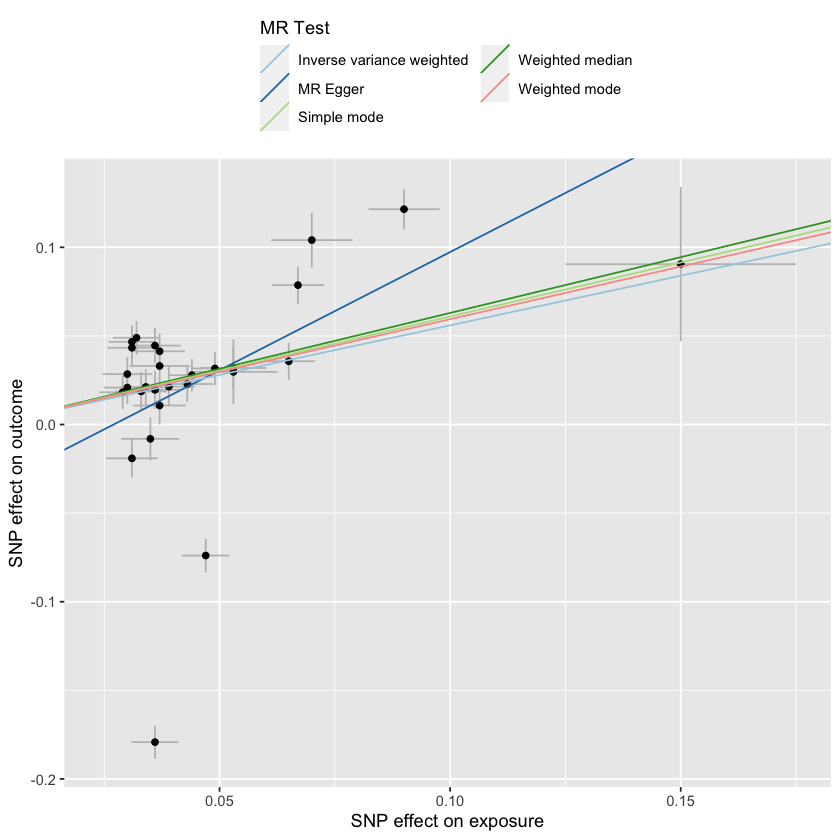

In [14]:
res <- mr(harmonized_data)
p1 <- mr_scatter_plot(res, harmonized_data)
p1[[1]]

Warning message:
“Removed 1 rows containing missing values (`geom_errorbarh()`).”
Warning message:
“Removed 1 rows containing missing values (`geom_point()`).”


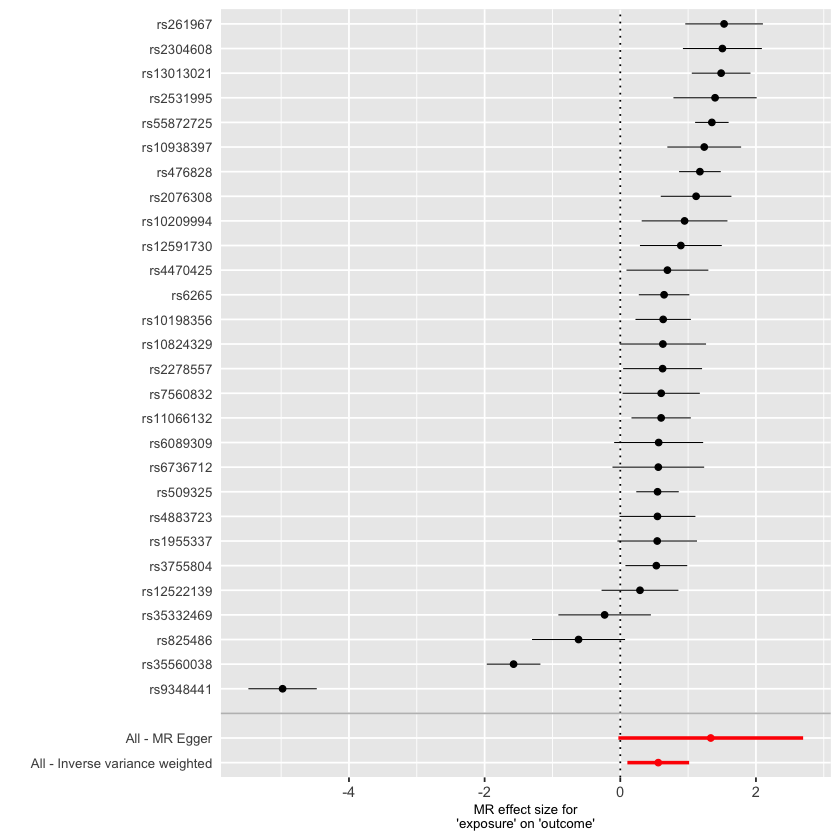

In [15]:
res_single <- mr_singlesnp(harmonized_data)
p2 <- mr_forest_plot(res_single)
p2[[1]]

Warning message:
“Removed 1 rows containing missing values (`geom_errorbarh()`).”
Warning message:
“Removed 1 rows containing missing values (`geom_point()`).”


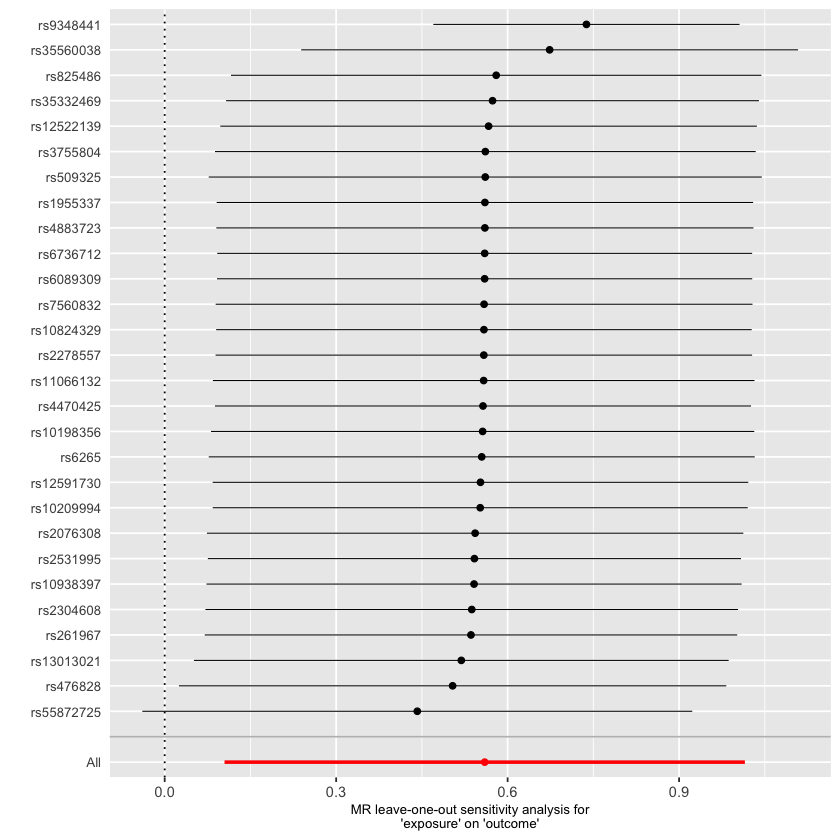

In [16]:
res_loo <- mr_leaveoneout(harmonized_data)
p3 <- mr_leaveoneout_plot(res_loo)
p3[[1]]

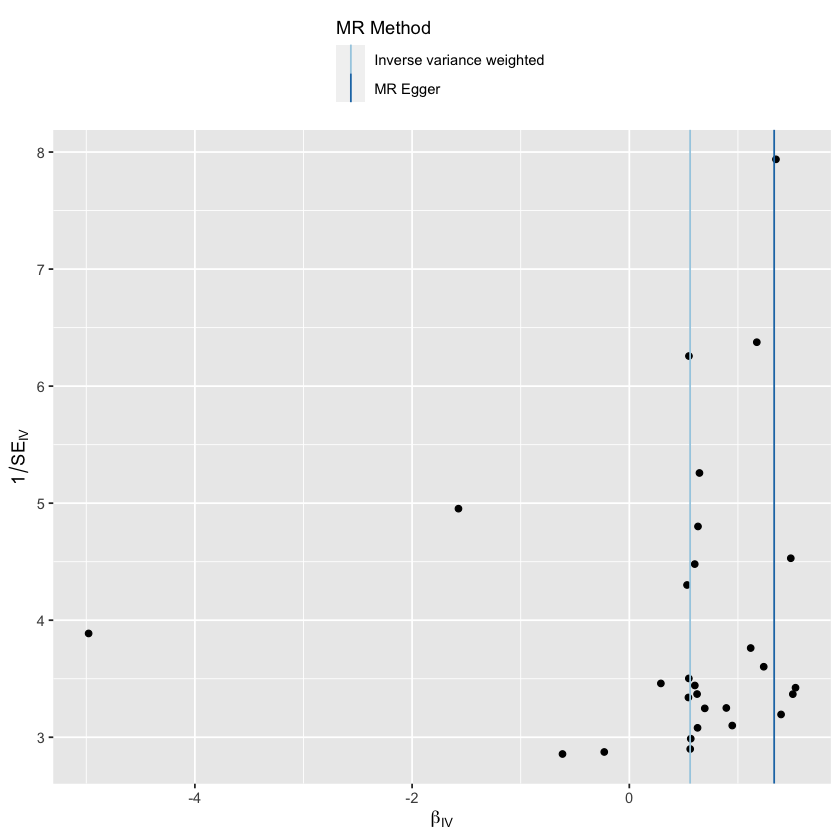

In [17]:
res_single <- mr_singlesnp(harmonized_data)
p4 <- mr_funnel_plot(res_single)
p4[[1]]